# 03. 일반화된 선형 회귀 모델2

## 당료 데이터에 대해서 Ridge, Lasso 적용해 보자 

### 1. Ridge

결정계수 :  0.45283711784584657
평균 절대 오차 (MAE) :  43.055757536466906


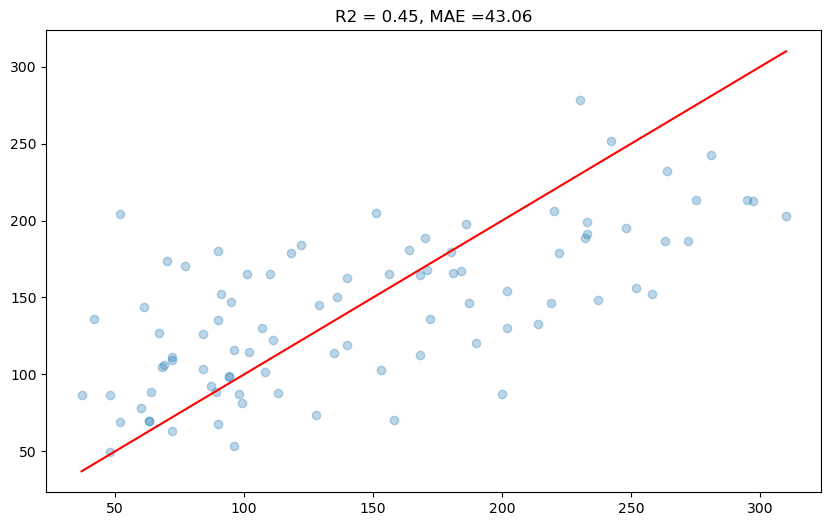

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score

# 당료병 데이터 셋 로드 
diabetes = load_diabetes()

# 특성과 타켓 변수를 분리
x, y = diabetes.data,  diabetes.target

# **노이즈(10개의 노이즈 특성 ) 추가
noise = np.random.randint(5,30, (x.shape[0], 10))
newX = np.hstack([noise, x])

# 훈련세트와 테스트 세트로 분리
X_train, X_test, Y_train, Y_test = train_test_split(newX, y, test_size=0.2, random_state=42)

# 데이터 정규화(표준화 스케일링)
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Ridge (릿지)회귀 모델 생성
ridge = Ridge()

# 교차 검증에 사용하기 위한 alpha 값 찾기 
param_grid = {'alpha' : np.logspace(-4,4,50)}

# cv=5 , 5-겹 교차 검증 사용하여 모델 평가 
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, Y_train)


# 최적의 alpha 값으로 모델 생성 
best_alpha = grid_search.best_params_['alpha']
ridge_best = Ridge(alpha = best_alpha)
ridge_best.fit(X_train, Y_train)

# 테스트 세트에 대한 예측 
Y_pred = ridge_best.predict(X_test)

# 결정계수
r2 = r2_score(Y_test, Y_pred)
print("결정계수 : " , r2)

# 평균 절대 오차 (MAE) 계산 
mae = mean_absolute_error(Y_test, Y_pred)
print("평균 절대 오차 (MAE) : " , mae)

# 시각화
plt.figure(figsize=(10,6))
plt.scatter(Y_test, Y_pred, alpha=0.3)
plt.plot([Y_test.min(), Y_test.max()],[Y_test.min(), Y_test.max()], c='red')
plt.title("R2 = {:.2f}, MAE ={:.2f}" .format(r2, mae))
plt.show()

### 2. Lasso

결정계수 :  0.4606877132292917
평균 절대 오차 (MAE) :  42.88784335830481


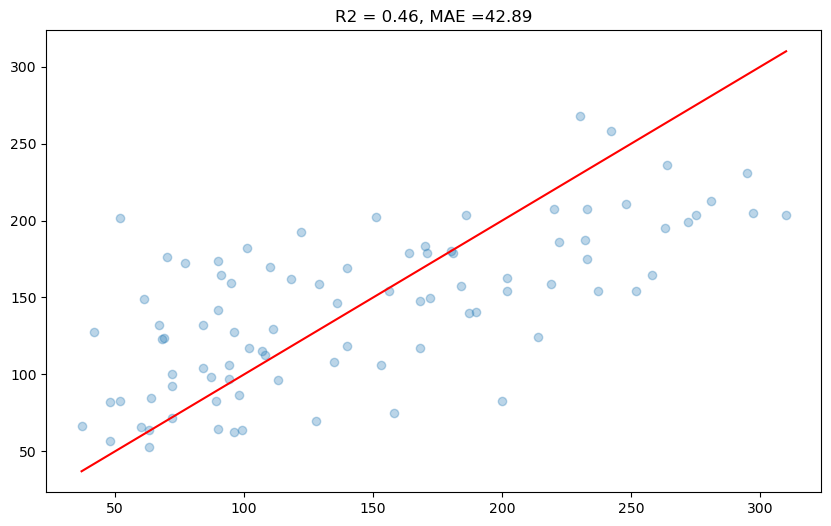

In [2]:
from sklearn.linear_model import Lasso


# 당료병 데이터세 로드 
diabetes = load_diabetes()

# 특성과 타켓 변수를 분리
x, y = diabetes.data,  diabetes.target

# **노이즈(10개의 노이즈 특성 ) 추가
noise = np.random.randint(5,30, (x.shape[0], 10))
newX = np.hstack([noise, x])

# 훈련세트와 테스트 세트로 분리
X_train, X_test, Y_train, Y_test = train_test_split(newX, y, test_size=0.2, random_state=42)

# 데이터 정규화(표준화 스케일링)
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Lasso (랏소)회귀 모델 생성
lasso = Lasso()

# 교차 검증에 사용하기 위한 alpha 값 찾기 
param_grid = {'alpha' : np.logspace(-4,4,50)}

# cv=5 , 5-겹 교차 검증 사용하여 모델 평가 
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, Y_train)


# 최적의 alpha 값으로 모델 생성 
best_alpha = grid_search.best_params_['alpha']
lasso_best = Lasso(alpha = best_alpha)
lasso_best.fit(X_train, Y_train)

# 테스트 세트에 대한 예측 
Y_pred = lasso_best.predict(X_test)

# 결정계수
r2 = r2_score(Y_test, Y_pred)
print("결정계수 : " , r2)

# 평균 절대 오차 (MAE) 계산 
mae = mean_absolute_error(Y_test, Y_pred)
print("평균 절대 오차 (MAE) : " , mae)

# 시각화
plt.figure(figsize=(10,6))
plt.scatter(Y_test, Y_pred, alpha=0.3)
plt.plot([Y_test.min(), Y_test.max()],[Y_test.min(), Y_test.max()], c='red')
plt.title("R2 = {:.2f}, MAE ={:.2f}" .format(r2, mae))
plt.show()